In [33]:
T = BigFloat  # precision type (change here if needed)
setprecision(T, 256) 

# T = Float64;

include("Equation expressions/CosmoTimeStepExpr.jl")
include("Equation expressions/CosmoCoeffExpr.jl")
include("Equation expressions/CosmoConstrExpr.jl")
include("cheb.jl")
include("solvers.jl")

Vfun(x) = ( -576. - 288. * x^2 - 64. * x^4 + 22. * x^6 - x^8) / 192.;
DV(x) = - x * (144. + 64. * x^2 - 33. * x^4 + 2. * x^6) / 48.;

const E = exp(T(1.));

const H = T(3.);
const Om = T(4.);
const tstar = T(1.);
const DConst = 100;

In [34]:
Ndom = 4;
Npts = 15;
N = Ndom * Npts;
NVar = 5;

zmin = T(0.);
zmax = T(.6);


DiffMats2, DiffMats, grid = MultiGridChebyshev(zmin, zmax, Ndom,Npts);

In [35]:
InitGuess = zeros(T,NVar,N);
zAH = T(0.5);
X = zero(T);
tinit = T(-3.)
p2 = 0;
inita4 = T(-100);
M  = one(T);
margin = 10;

In [36]:
X = T(1.23);
Var = copy(InitGuess);

for ii in 1:200
    Var[2,1:N] = LinearSolveODE(Var, 1, inita4, X, tinit);
    Var[3,1:N] = LinearSolveODE(Var, 2, inita4, X, tinit);
    X = CorrectXi(Var, X, tinit, margin);
    print("\rX = $X")
    flush(stdout)
end

X = 1.232595201559296418598213036234791378585131844432402469337114902006122345360188

In [38]:
# Having computed ξ(t_0), we change the grid so that it ends precisely at the apparent horizon, zmax = zAH
# This seemed to have made the code run better, but more testing would be good.

#Or let's try this instead.

initX = copy(X);

Ndom = 4;
Npts = 15;
N = Ndom * Npts;
NVar = 5;
IterMax = 10;

zmin = T(1.e-20);
zmax = T(.6);

DiffMats2, DiffMats, grid = MultiGridChebyshev(zmin, zmax, Ndom,Npts);

InitGuess = zeros(T,NVar,N);

In [39]:
InitVar = ComputeBulk(Var[1,1:N], initX, inita4, tinit);

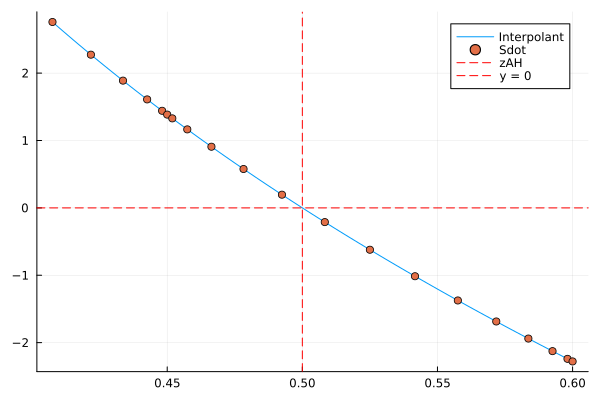

In [40]:
fig = PlotSdot(InitVar, initX,tinit, 40);
display(fig)

In [41]:
dt = T(.001);


outfile = open("Data files/CosmoOutputA4100.bin","w");
monitorfile = open("Data files/CosmoMonitorA4100.bin","w");

VarFinal, XFinal, a4Final = Evolve(InitVar, initX, inita4, T(tinit), 5, dt, 10, outfile, monitorfile);

close(outfile);
close(monitorfile);


◒ time = 1.861, constraint violation = 127.658    Time: 0:12:04

LoadError: InterruptException: